## Librerias

In [30]:
import pandas as pd
import re
import plotly.express as px
import matplotlib.pyplot as plt

In [31]:
cantidad = 0
with open('../Datos/Originales/apache-logs.txt', 'r') as archivo:
    # Lee cada línea del archivo
    for linea in archivo:
        # Imprime cada línea
        cantidad +=1
print(cantidad)

13853


## Lectura

In [46]:
# pattern = r'^(\S+) (\S+) (\S+) \[(.*?)\] "(\S+) (\S+) (\S+)" (\d+) (\d+) "([^"]+)" "([^"]+)"'

# # Lista para almacenar los resultados
# data = []

# # Leer el archivo de texto línea por línea
# with open('../Datos/Originales/apache-logs.txt', 'r') as file:
#     for log_line in file:
#         matches = re.match(pattern, log_line)
#         if matches:
#             client_ip, ident, auth, timestamp, method, request, hhtp_version, status_code, bytes_sent, referrer, user_agent = matches.groups()
#             data.append([client_ip, ident, auth, timestamp, method, request, hhtp_version, status_code, bytes_sent, referrer, user_agent])
#         else:
#             print("No match found for line:", log_line)

# # Crear DataFrame
# df = pd.DataFrame(data, columns=['Client IP', 'Ident', 'Auth', 'Timestamp', 'Method', 'Request', 'HTTP Version', 'Status Code', 'Bytes Sent', 'Referrer', 'User Agent'])


In [47]:
# df.head()

In [48]:
# Patrón para analizar las líneas del archivo de registro
pattern = r'^(\S+) (\S+) (\S+) \[(.*?)\] "(\S+) (\S+) (\S+)" (\d+) (\d+) "([^"]+)" "([^"]+)"'

# Listas para almacenar los resultados
valid_data = []
invalid_data = []

# Leer el archivo de texto línea por línea
with open('../Datos/Originales/apache-logs.txt', 'r') as file:
    for log_line in file:
        matches = re.match(pattern, log_line)
        if matches:
            # Si hay coincidencia con el patrón, agregar a datos válidos
            client_ip, ident, auth, timestamp, method, request, hhtp_version, status_code, bytes_sent, referrer, user_agent = matches.groups()
            valid_data.append([client_ip, ident, auth, timestamp, method, request, hhtp_version, status_code, bytes_sent, referrer, user_agent])
        else:
            # Si no hay coincidencia, agregar a datos inválidos
            invalid_data.append([log_line.strip()])

# Crear DataFrame para datos válidos
df = pd.DataFrame(valid_data, columns=['Client IP', 'Ident', 'Auth', 'Timestamp', 'Method', 'Request', 'HTTP Version', 'Status Code', 'Bytes Sent', 'Referrer', 'User Agent'])

# Crear DataFrame para datos inválidos
df_invalid = pd.DataFrame(invalid_data, columns=['Invalid Lines'])

# Mostrar información sobre las líneas no coincidentes
print("Líneas no coincidentes:", len(df_invalid))

Líneas no coincidentes: 231


In [49]:
df

,Client IP,Ident,Auth,Timestamp,Method,Request,HTTP Version,Status Code,Bytes Sent,Referrer,User Agent
0,"""192.168.4.164",-,-,22/Dec/2023:15:19:05 +0300,GET,/DVWA/,HTTP/1.1,200,2020,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
1,"""192.168.4.164",-,-,22/Dec/2023:15:19:06 +0300,HEAD,/DVWA/,HTTP/1.1,200,263,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
2,"""192.168.4.164",-,-,22/Dec/2023:15:19:06 +0300,HEAD,/DVWA/.git/config,HTTP/1.1,404,139,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
3,"""192.168.4.164",-,-,22/Dec/2023:15:19:06 +0300,HEAD,/DVWA/.git/config,HTTP/1.1,404,139,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
4,"""192.168.4.164",-,-,22/Dec/2023:15:19:06 +0300,HEAD,/DVWA/.svn/all-wcprops,HTTP/1.1,404,139,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
...,...,...,...,...,...,...,...,...,...,...,...
13617,"""192.168.4.25",-,-,22/Dec/2022:16:22:11 +0300,POST,/index.php/component/search/,HTTP/1.1,303,376,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
13618,"""192.168.4.25",-,-,22/Dec/2022:16:33:44 +0300,POST,/index.php/component/search/,HTTP/1.1,303,417,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
13619,"""192.168.4.25",-,-,22/Dec/2022:16:23:07 +0300,POST,/index.php/component/search/,HTTP/1.1,303,393,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
13620,"""192.168.4.25",-,-,22/Dec/2022:16:32:54 +0300,POST,/index.php/component/search/,HTTP/1.1,200,3054,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...


In [21]:
for i, row in df_invalid.iterrows():
    print (row[0])

"192.168.4.164 - - [22/Dec/2023:15:19:14 +0300] "GET /DVWA/ HTTP/1.1" 200 1964 "() { :;}; echo \"NS:\" $(/bin/sh -c \"expr 268409241 - 2\")" "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.16 Safari/537.36""
"192.168.4.164 - - [22/Dec/2023:15:19:15 +0300] "GET /DVWA/ HTTP/1.1" 200 1964 "'\"@--></style></scRipt><scRipt>netsparker(0x000008)</scRipt>" "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.16 Safari/537.36""
"192.168.4.164 - - [22/Dec/2023:15:19:15 +0300] "GET /DVWA/ HTTP/1.1" 200 1964 "'\"@--></style></scRipt><scRipt>netsparker(0x000009)</scRipt>" "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.16 Safari/537.36""
"192.168.4.164 - - [22/Dec/2023:15:19:15 +0300] "GET /DVWA/ HTTP/1.1" 200 1964 "'\"--></style></scRipt><scRipt>netsparker(0x000006)</scRipt>" "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.16

C:\Users\maria\AppData\Local\Temp\ipykernel_26844\1443181846.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print (row[0])


In [38]:
log_pattern = r'^(\S+) (\S+) (\S+) \[(.*?)\] "(\S+) (\S+.*?) (\S+)" (\d+) (\d+)'

# Dataframe para almacenar los datos válidos
valid_data = []

# Iteración sobre las filas del DataFrame
for i, row in df_invalid.iterrows():
    match = re.match(log_pattern, row[0])
    if match:
        # Accede a los grupos capturados para obtener los campos relevantes
        client_ip = match.group(1)
        timestamp = match.group(4)
        method = match.group(5)
        request = match.group(6)
        status_code = match.group(8)
        bytes_sent = match.group(9)
        
        # Agrega los datos a la lista
        valid_data.append([client_ip, timestamp, method, request, status_code, bytes_sent])
    else:
        print("No match found for line:", row[0])

# Crear DataFrame con los datos válidos
df_invalid = pd.DataFrame(valid_data, columns=['Client IP', 'Timestamp', 'Method', 'Request', 'Status Code', 'Bytes Sent'])

No match found for line: "192.168.4.25 - - [22/Dec/2022:16:18:09 +0300] "GET  HTTP/1.1" 400 300 "-" "-""


C:\Users\maria\AppData\Local\Temp\ipykernel_26844\216764288.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  match = re.match(log_pattern, row[0])
C:\Users\maria\AppData\Local\Temp\ipykernel_26844\216764288.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("No match found for line:", row[0])


In [39]:
df_invalid

,Client IP,Timestamp,Method,Request,Status Code,Bytes Sent
0,"""192.168.4.164",22/Dec/2023:15:19:14 +0300,GET,/DVWA/,200,1964
1,"""192.168.4.164",22/Dec/2023:15:19:15 +0300,GET,/DVWA/,200,1964
2,"""192.168.4.164",22/Dec/2023:15:19:15 +0300,GET,/DVWA/,200,1964
3,"""192.168.4.164",22/Dec/2023:15:19:15 +0300,GET,/DVWA/,200,1964
4,"""192.168.4.164",22/Dec/2023:15:19:15 +0300,GET,/DVWA/,200,1964
...,...,...,...,...,...,...
225,"""192.168.4.25",22/Dec/2022:16:18:08 +0300,GET,/cgi-sys/entropybanner.cgi,404,516
226,"""192.168.4.25",22/Dec/2022:16:18:07 +0300,GET,/,200,3358
227,"""192.168.4.25",22/Dec/2022:16:18:08 +0300,GET,/cgi-sys/domainredirect.cgi,404,517
228,"""192.168.4.25",22/Dec/2022:16:18:26 +0300,GET,/index.php/component/users/?wvstest=javascript...,200,2822


## Duplicidades

In [50]:
df[df.duplicated()]

,Client IP,Ident,Auth,Timestamp,Method,Request,HTTP Version,Status Code,Bytes Sent,Referrer,User Agent
3,"""192.168.4.164",-,-,22/Dec/2023:15:19:06 +0300,HEAD,/DVWA/.git/config,HTTP/1.1,404,139,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
5,"""192.168.4.164",-,-,22/Dec/2023:15:19:06 +0300,HEAD,/DVWA/.svn/all-wcprops,HTTP/1.1,404,139,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
7,"""192.168.4.164",-,-,22/Dec/2023:15:19:06 +0300,HEAD,/DVWA/.svn/wc.db,HTTP/1.1,404,139,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
9,"""192.168.4.164",-,-,22/Dec/2023:15:19:06 +0300,HEAD,/DVWA/~.aspx,HTTP/1.1,404,139,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
11,"""192.168.4.164",-,-,22/Dec/2023:15:19:06 +0300,HEAD,/DVWA/cgi-bin/,HTTP/1.1,404,139,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
...,...,...,...,...,...,...,...,...,...,...,...
13591,"""192.168.4.25",-,-,22/Dec/2022:16:38:55 +0300,POST,/index.php/component/users/?task=registration....,HTTP/1.1,200,237,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
13595,"""192.168.4.25",-,-,22/Dec/2022:16:27:03 +0300,POST,/index.php/component/search/,HTTP/1.1,200,3053,-,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
13613,"""192.168.4.25",-,-,22/Dec/2022:16:29:16 +0300,POST,/administrator/index.php,HTTP/1.1,500,1522,-,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
13617,"""192.168.4.25",-,-,22/Dec/2022:16:22:11 +0300,POST,/index.php/component/search/,HTTP/1.1,303,376,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...


In [51]:
df_invalid[df_invalid.duplicated()]

,Invalid Lines
136,"""192.168.4.164 - - [22/Dec/2023:15:20:34 +0300..."


# Eliminar duplicidades???????????

Distribucion method

In [ ]:
df['Method'].unique()

array(['GET', 'HEAD', 'NETSPARKER', 'POST', 'OPTIONS', 'PROPFIND'],
      dtype=object)

In [ ]:
metodos = df['Method'].value_counts().reset_index()
metodos

,Method,count
0,POST,6689
1,GET,4826
2,HEAD,2038
3,OPTIONS,34
4,PROPFIND,34
5,NETSPARKER,1


In [ ]:
fig = px.bar(metodos, x='Method', y='count', color='Method', title='Distribución de los métodos')

# Mostrar el gráfico
fig.show()

Peticiones % que llegan bien

In [ ]:
peticiones = df[df['Method'] == 'GET']

In [ ]:
peticiones.head()

,Client IP,Ident,Auth,Timestamp,Method,Request,HTTP Version,Status Code,Bytes Sent,Referrer,User Agent
0,"""192.168.4.164",-,-,22/Dec/2023:15:19:05 +0300,GET,/DVWA/,HTTP/1.1,200,2020,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
26,"""192.168.4.164",-,-,22/Dec/2023:15:19:07 +0300,GET,/DVWA/,HTTP/1.1,302,433,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
27,"""192.168.4.164",-,-,22/Dec/2023:15:19:07 +0300,GET,/DVWA/login.php,HTTP/1.1,200,1016,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
206,"""192.168.4.164",-,-,22/Dec/2023:15:19:08 +0300,GET,/DVWA/,HTTP/1.1,302,414,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
207,"""192.168.4.164",-,-,22/Dec/2023:15:19:08 +0300,GET,/DVWA/dvwa/,HTTP/1.1,200,675,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...


In [ ]:
peticiones_status = peticiones['Status Code'].value_counts().reset_index()
peticiones_status

,Status Code,count
0,200,3808
1,404,770
2,500,163
3,302,55
4,301,18
5,400,11
6,403,1


In [ ]:
total_peticiones = peticiones_status['count'].sum()

# Calcular el porcentaje de cada barra con dos decimales
peticiones_status['porcentaje'] = (peticiones_status['count'] / total_peticiones * 100).round(2)

# Crear el gráfico de barras
fig = px.bar(peticiones_status, x='Status Code', y='count', color='Status Code', title='Distribución de los Status Code de las peticiones',
             text=peticiones_status['porcentaje'].astype(str) + '%')  # Mostrar el porcentaje de cada barra con dos decimales como texto

# Mostrar el gráfico
fig.show()

Envios % que se hacen bien

In [ ]:
envios = df[df['Method'] == 'POST']

In [ ]:
envios.head()

,Client IP,Ident,Auth,Timestamp,Method,Request,HTTP Version,Status Code,Bytes Sent,Referrer,User Agent
938,"""192.168.4.164",-,-,22/Dec/2023:15:19:10 +0300,POST,/DVWA/login.php,HTTP/1.1,302,329,http://192.168.4.161/DVWA/,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
1843,"""192.168.4.164",-,-,22/Dec/2023:15:19:17 +0300,POST,/DVWA/setup.php,HTTP/1.1,302,335,http://192.168.4.161/DVWA/setup.php,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
2023,"""192.168.4.164",-,-,22/Dec/2023:15:19:19 +0300,POST,/DVWA/vulnerabilities/exec/,HTTP/1.1,200,1659,http://192.168.4.161/DVWA/vulnerabilities/exec/,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
2024,"""192.168.4.164",-,-,22/Dec/2023:15:19:19 +0300,POST,/DVWA/vulnerabilities/exec/,HTTP/1.1,200,1659,http://192.168.4.161/DVWA/vulnerabilities/exec/,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
2025,"""192.168.4.164",-,-,22/Dec/2023:15:19:19 +0300,POST,/DVWA/vulnerabilities/exec/,HTTP/1.1,200,1762,http://192.168.4.161/DVWA/vulnerabilities/exec/,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...


In [ ]:
envios_status = envios['Status Code'].value_counts().reset_index()
envios_status

,Status Code,count
0,303,3407
1,200,1729
2,302,943
3,500,546
4,404,62
5,403,2


In [ ]:
total_envios = envios_status['count'].sum()

# Calcular el porcentaje de cada barra con dos decimales
envios_status['porcentaje'] = (envios_status['count'] / total_envios * 100).round(2)

# Crear el gráfico de barras
fig = px.bar(envios_status, x='Status Code', y='count', color='Status Code', title='Distribución de los Status Code de los envios',
             text=envios_status['porcentaje'].astype(str) + '%')  # Mostrar el porcentaje de cada barra con dos decimales como texto

# Mostrar el gráfico
fig.show()

In [54]:
# Calcular el ratio de bytes enviados y recibidos para cada método HTTP
bytes_sent = 0
bytes_received = 0

for i, row in df.iterrows():
    method = row['Method']
    bytes_str = row['Bytes Sent']
    bytes = int(bytes_str)  # Convierte la cadena a un número entero

    
    if method in ['GET', 'HEAD', 'NETSPARKER']:
        bytes_sent += bytes
    else:
        bytes_received += bytes

print("Total bytes sent:", bytes_sent)
print("Total bytes received:", bytes_received)


Total bytes sent: 7133163
Total bytes received: 6744949


In [ ]:
# Mapa de calor de bytes enviados vs recibidos en diferentes momentos del día
df_logs['Hour'] = df_logs['Timestamp'].dt.hour
heatmap_data = df_logs.groupby(['Hour'])[['Bytes Sent', 'Bytes Received']].mean()
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, cmap='viridis', aspect='auto')
plt.colorbar(label='Bytes')
plt.xlabel('Hora del día')
plt.ylabel('Día')
plt.title('Mapa de calor de bytes enviados y recibidos en diferentes momentos del día')
plt.show()

In [67]:
df['Latency'] 

0        31531122.0
1               0.0
2               0.0
3               0.0
4               0.0
            ...    
13617           0.0
13618           0.0
13619           1.0
13620           1.0
13621           0.0
Name: Latency, Length: 13622, dtype: float64

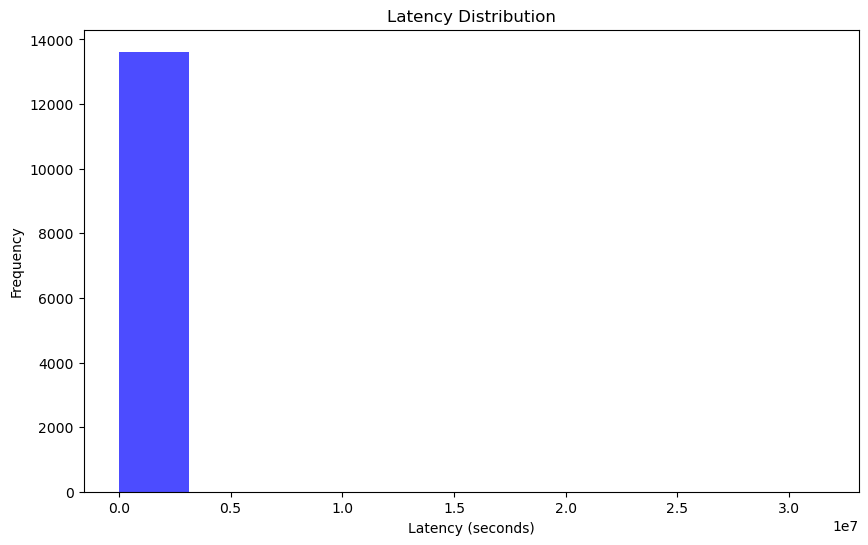

In [66]:
# Análisis de latencia
df['Latency'] = (df_ordenado['Timestamp:'] - df_ordenado['Timestamp:'].shift()).fillna(0)

# Visualizar la latencia en un histograma
plt.figure(figsize=(10, 6))
plt.hist(df['Latency'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Latency (seconds)')
plt.ylabel('Frequency')
plt.title('Latency Distribution')
plt.show()

In [ ]:
df['Timestamp:']

0        1.703248e+09
1        1.703248e+09
2        1.703248e+09
3        1.703248e+09
4        1.703248e+09
             ...     
13617    1.671715e+09
13618    1.671716e+09
13619    1.671715e+09
13620    1.671716e+09
13621    1.671715e+09
Name: Timestamp:, Length: 13622, dtype: float64

In [59]:
df_ordenado = df.sort_values(by='Timestamp')

In [60]:
formato_entrada = "%d/%b/%Y:%H:%M:%S %z"

In [61]:
from datetime import datetime

In [62]:
df_ordenado['Timestamp:'] = df_ordenado['Timestamp'].apply(lambda x: datetime.strptime(x, formato_entrada).timestamp())

In [89]:
df_ordenado['Timestamp:']

9611     1.671715e+09
12210    1.671715e+09
9036     1.671715e+09
10667    1.671715e+09
7989     1.671715e+09
             ...     
7085     1.703249e+09
7086     1.703249e+09
7087     1.703249e+09
7088     1.703249e+09
7089     1.703249e+09
Name: Timestamp:, Length: 13622, dtype: float64

In [75]:
df_ordenado

,Client IP,Ident,Auth,Timestamp,Method,Request,HTTP Version,Status Code,Bytes Sent,Referrer,User Agent,Timestamp:,Latency
9611,"""192.168.4.25",-,-,22/Dec/2022:16:11:41 +0300,POST,/DVWA/login.php,HTTP/1.1,200,1532,-,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,1.671715e+09,NaN
12210,"""192.168.4.25",-,-,22/Dec/2022:16:11:41 +0300,GET,/DVWA,HTTP/1.1,301,518,-,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,1.671715e+09,0.0
9036,"""192.168.4.25",-,-,22/Dec/2022:16:18:05 +0300,GET,/DVWA/login.php,HTTP/1.1,200,969,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,1.671715e+09,384.0
10667,"""192.168.4.25",-,-,22/Dec/2022:16:18:05 +0300,GET,/DVWA,HTTP/1.1,301,537,-,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,1.671715e+09,0.0
7989,"""192.168.4.25",-,-,22/Dec/2022:16:18:06 +0300,GET,/DVWA/,HTTP/1.1,200,1983,-,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,1.671715e+09,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085,"""192.168.4.164",-,-,22/Dec/2023:15:37:15 +0300,POST,/DVWA/vulnerabilities/exec/,HTTP/1.1,200,1714,http://192.168.4.161/DVWA/vulnerabilities/exec/,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,1.703249e+09,36.0
7086,"""192.168.4.164",-,-,22/Dec/2023:15:37:15 +0300,POST,/DVWA/vulnerabilities/exec/,HTTP/1.1,200,1714,http://192.168.4.161/DVWA/vulnerabilities/exec/,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,1.703249e+09,0.0
7087,"""192.168.4.164",-,-,22/Dec/2023:15:37:27 +0300,POST,/DVWA/vulnerabilities/exec/,HTTP/1.1,200,1714,http://192.168.4.161/DVWA/vulnerabilities/exec/,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,1.703249e+09,12.0
7088,"""192.168.4.164",-,-,22/Dec/2023:15:37:27 +0300,POST,/DVWA/vulnerabilities/exec/,HTTP/1.1,200,1714,http://192.168.4.161/DVWA/vulnerabilities/exec/,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,1.703249e+09,0.0


In [82]:
df_ordenado[df_ordenado['Latency'] > 2]['Latency'].unique()

array([3.8400000e+02, 4.0000000e+00, 3.0000000e+00, 3.1531122e+07,
       6.0000000e+00, 1.1000000e+01, 1.2000000e+01, 2.4000000e+01,
       1.4000000e+01, 2.7000000e+01, 2.9000000e+01, 9.0000000e+00,
       1.3000000e+01, 1.0000000e+01, 3.6000000e+01])

In [80]:
filas_juan = df_ordenado[df_ordenado.index == 0]
filas_juan

,Client IP,Ident,Auth,Timestamp,Method,Request,HTTP Version,Status Code,Bytes Sent,Referrer,User Agent,Timestamp:,Latency
0,"""192.168.4.164",-,-,22/Dec/2023:15:19:05 +0300,GET,/DVWA/,HTTP/1.1,200,2020,-,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,1.703248e+09,31531122.0


In [81]:
indice_nuevo = df_ordenado.index.get_loc(0)
indice_nuevo

6532

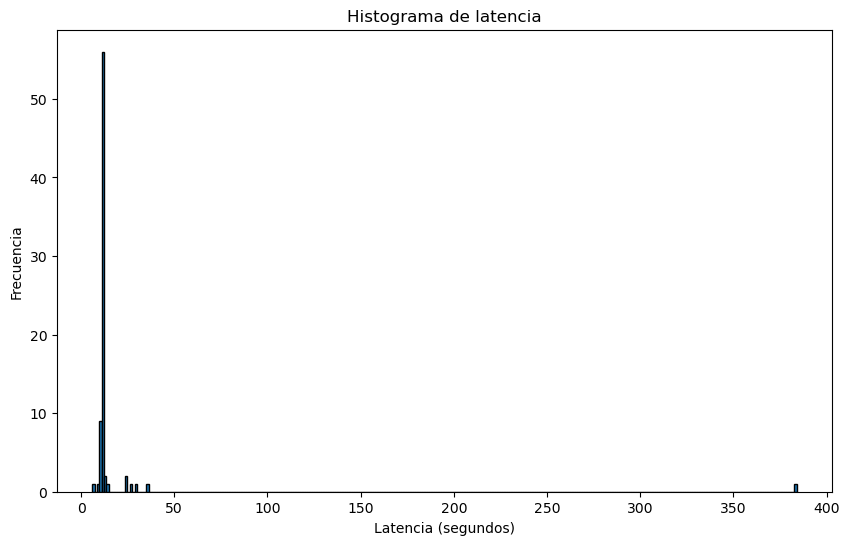

In [86]:
# Análisis de latencia
df_ordenado['Latency'] = (df_ordenado['Timestamp:'] - df_ordenado['Timestamp:'].shift())

df_filtrado = df_ordenado[(df_ordenado['Latency'] != 0) & (df_ordenado['Latency'] < 3000) & (df_ordenado['Latency'] > 4)] 

# Visualizar la latencia en un histograma
plt.figure(figsize=(10, 6))
plt.hist(df_filtrado['Latency'],bins = 300, edgecolor='black')
plt.xlabel('Latencia (segundos)')
plt.ylabel('Frecuencia')
plt.title('Histograma de latencia')
plt.show()

In [ ]:
df['Latency'].unique()

array([       nan,  1.000e+00,  0.000e+00, ...,  9.760e+02,  1.233e+03,
       -7.030e+02])